# Chapter 5
## Graph Algorithms

Graph mechanics and types

In [1]:
import networkx as nx
graph = nx.Graph()

In [2]:
graph.add_node("Mike")

In [3]:
graph.add_nodes_from(["Amine", "Wassim", "Nick"])

In [4]:
graph.add_edge("Mike", "Amine")

In [5]:
print(graph.nodes())
print(graph.edges())

['Mike', 'Amine', 'Wassim', 'Nick']
[('Mike', 'Amine')]


In [6]:
graph.add_edge("Amine", "Imran")

In [7]:
print(graph.edges())

[('Mike', 'Amine'), ('Amine', 'Imran')]


## Calculating centrality metrics

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
vertices = range(1, 10)
edges = [(7, 2), (2, 3), (7, 4), (4, 5), (7, 3), (7, 5), (1, 6), (1, 7), (2, 8), (2, 9)]

Crafting the Graph

In [10]:
graph = nx.Graph()
graph.add_nodes_from(vertices)
graph.add_edges_from(edges)

Painting a picture

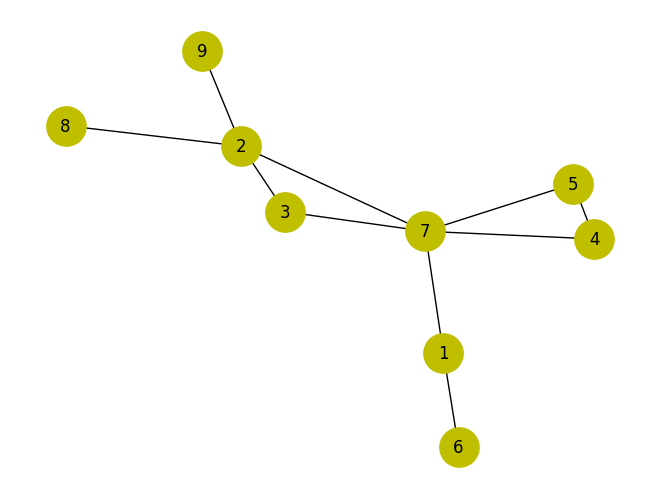

In [11]:
nx.draw(graph, with_labels=True, node_color='y', node_size=800)
plt.show()

In [12]:
print("Degree Centrality:", nx.degree_centrality(graph))

Degree Centrality: {1: 0.25, 2: 0.5, 3: 0.25, 4: 0.25, 5: 0.25, 6: 0.125, 7: 0.625, 8: 0.125, 9: 0.125}


In [13]:
print("Betweenness Centrality:", nx.betweenness_centrality(graph))

Betweenness Centrality: {1: 0.25, 2: 0.46428571428571425, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.7142857142857142, 8: 0.0, 9: 0.0}


In [14]:
print("Closeness Centrality:", nx.closeness_centrality(graph))

Closeness Centrality: {1: 0.5, 2: 0.6153846153846154, 3: 0.5333333333333333, 4: 0.47058823529411764, 5: 0.47058823529411764, 6: 0.34782608695652173, 7: 0.7272727272727273, 8: 0.4, 9: 0.4}


In [15]:
eigenvector_centrality = nx.eigenvector_centrality(graph)
sorted_centrality = sorted((vertex, '{:0.2f}'.format(centrality_val))
                           for vertex, centrality_val in eigenvector_centrality.items())
print("Eigenvector Centrality:", sorted_centrality)

Eigenvector Centrality: [(1, '0.24'), (2, '0.45'), (3, '0.36'), (4, '0.32'), (5, '0.32'), (6, '0.08'), (7, '0.59'), (8, '0.16'), (9, '0.16')]


BFS

In [21]:
graph={ 'Amin'   : {'Wasim', 'Nick', 'Mike'},
         'Wasim' : {'Imran', 'Amin'},
         'Imran' : {'Wasim','Faras'},
         'Faras' : {'Imran'},
         'Mike'  : {'Amin'},
         'Nick' :  {'Amin'}}

## BFS Algorithm Implementation:
### Initialization and Main Loop
**Initialization:** Our traversal through the graph relies on two key data structures:

>•	**visited:** A set that will hold all vertices we've explored. It starts empty.

>•	**queue:** A list used to hold vertices pending exploration. Initially, it will contain just our starting vertex.

**Main Loop**: The primary logic of BFS revolves around exploring nodes layer by layer:
> 1.	Remove the first node from the queue and consider it as the current node for the iteration: node = queue.pop(0)
2.	If the node hasn't been visited, mark it as visited and fetch its neighbors:


In [23]:
def bfs(graph, start):
    visited = set()
    queue = [start]

    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.add(node)
            neighbours = graph[node]

            # Only add neighbors to the queue that have not been visited yet
            unvisited_neighbours = [neighbour for neighbour in neighbours if neighbour not in visited]
            queue.extend(unvisited_neighbours)

    return visited

# Test


start_node = 'Amin'
print(bfs(graph, start_node))


{'Nick', 'Faras', 'Mike', 'Amin', 'Imran', 'Wasim'}


DFS

In [24]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    print(start)
    for next in graph[start] - visited:
        dfs(graph, next, visited)
    return visited

graph={ 'Amin' : {'Wasim', 'Nick', 'Mike'},
         'Wasim' : {'Imran', 'Amin'},
         'Imran' : {'Wasim','Faras'},
         'Faras' : {'Imran'},
         'Mike'  :{'Amin'},
         'Nick'  :{'Amin'}}


### Case study: fraud detection using SNA

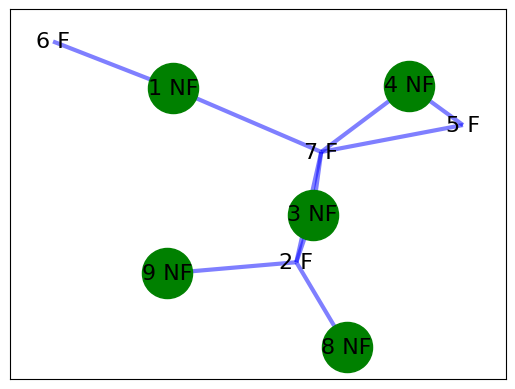

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

vertices = range(1,10)
edges= [(7,2), (2,3), (7,4), (4,5), (7,3), (7,5), (1,6),(1,7),(2,8),(2,9)]

graph = nx.Graph()

graph.add_nodes_from(vertices)
graph.add_edges_from(edges)
positions = nx.spring_layout(graph)

# Drawing the nodes with green color
nx.draw_networkx_nodes(graph, positions,
                       nodelist=[1, 4, 3, 8, 9],
                       node_color='g',
                       node_size=1300)

# No need to repeat the above call

labels = {1: '1 NF', 2: '2 F', 3: '3 NF', 4: '4 NF', 5: '5 F', 6: '6 F', 7: '7 F', 8: '8 NF', 9: '9 NF'}
nx.draw_networkx_labels(graph, positions, labels, font_size=16)

# Drawing the edges
nx.draw_networkx_edges(graph, positions, edges, width=3, alpha=0.5, edge_color='b')

plt.show()  # Display the graph

